# EDA Basics

**References**  
Title: Bank Marketing  
Sources Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012  
Past Usage:  
The full dataset was described and analyzed in:  
S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bank.csv", delimiter=";")

## Start with Basic Exploration

1. What is the *Shape* of the data? How many rows, and columns?
2. What types of data are in the dataset? Text, numeric, categorical, etc.
3. Take a look at the head and tail of the dataset.

In [3]:
df.shape

(4521, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


## Describe the Data

Show statistical summaries of all the data in the datset.

In [7]:
# Without an parameters passed into the describ function, it will return numerical only.
df.describe().round(2)

,age,balance,day,duration,campaign,pdays,previous
count,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00
mean,41.17,1422.66,15.92,263.96,2.79,39.77,0.54
std,10.58,3009.64,8.25,259.86,3.11,100.12,1.69
min,19.00,-3313.00,1.00,4.00,1.00,-1.00,0.00
25%,33.00,69.00,9.00,104.00,1.00,-1.00,0.00
50%,39.00,444.00,16.00,185.00,2.00,-1.00,0.00
75%,49.00,1480.00,21.00,329.00,3.00,-1.00,0.00
max,87.00,71188.00,31.00,3025.00,50.00,871.00,25.00


**Observations**  
 - **Age**: Values range from `19` to `87` years old with a mean of `41`.  These values seem logical.
 - **Balance**: Balances range from `-$3,313` to `$71,188`.  This also makes sense.  People can have negative balances (overdrawn) and also potentially have large savings. However, the mean savings are only `$263` with a standard deviation of `$259`, telling us that most people's savings values are in the lower range.
 - **day**: This is a numeric representation of the day of the month, values ranging from 1-31`.
 - **duration**: duration is the length of the last contact in seconds.  If this value is `0`, then the dependent variable y will be `no`.  There are no values of `0` in this dataset.  The min is `4` seconds, max of `3025` seconds or `50.4` hours.  It doesn't seem possible that there was a call over two days.  The 75% quartile value is `329` seconds or `5.5` minutes.
 - **campaign**: The number of contacts to the customer during the campaign. They are ranging from `1` to `50` with a mean of `2.79`. 
 - **pdays**: Number of days that passed since the last contact.  Values from `-1` to `871` or `2.38` years.  This is plausible since banking relationships can last decades.  `999` means the client was not previously contacted (there are no values with this number. However, there is a massive number with the `-1` value.  This is most likely representing no prior contact.
 - **previous**: Number of contacts to the customer before this campaign started.  Values were ranging from `0` (new customer / first campaign) to `25`.

In [8]:
# You can include `all` or `object` if you want to do the categorical data as well.
df.describe(include='object').round(2)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


## Gather Data by Type

Create separate dataframes for numeric and text data.

In [9]:
# get numerical data only
numeric_data = df.select_dtypes(include=['int64'])
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       4521 non-null   int64
 1   balance   4521 non-null   int64
 2   day       4521 non-null   int64
 3   duration  4521 non-null   int64
 4   campaign  4521 non-null   int64
 5   pdays     4521 non-null   int64
 6   previous  4521 non-null   int64
dtypes: int64(7)
memory usage: 247.4 KB


In [10]:
# get categorical data
cat_data = df.select_dtypes(include=['object'])

cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        4521 non-null   object
 1   marital    4521 non-null   object
 2   education  4521 non-null   object
 3   default    4521 non-null   object
 4   housing    4521 non-null   object
 5   loan       4521 non-null   object
 6   contact    4521 non-null   object
 7   month      4521 non-null   object
 8   poutcome   4521 non-null   object
 9   y          4521 non-null   object
dtypes: object(10)
memory usage: 353.3+ KB


## Show Categorical Counts

By looking at the head and tail we can see we don't have any pure text data such as descriptions.  We now know that they're potentially categorical and we can better understand category counts

In [11]:
# show counts values of each categorical variable
for colname in cat_data.columns:
    print (colname)
    print (cat_data[colname].value_counts(), '\n')

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64 

marital
married     2797
single      1196
divorced     528
Name: marital, dtype: int64 

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64 

default
no     4445
yes      76
Name: default, dtype: int64 

housing
yes    2559
no     1962
Name: housing, dtype: int64 

loan
no     3830
yes     691
Name: loan, dtype: int64 

contact
cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64 

month
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64 

poutcome
unknown    3705
failure     490
other       197
success 

## Check for Null Values

This dataset doesn't have any `null` values, however these are simple methods for checking both if there are any and the counts of `nulls` if there are

In [12]:
# check for nan/null
df.isnull().values.any()

False

In [13]:
# count of nulls
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [14]:
# Drop NULL values
df.dropna(inplace=True)

## Check for Duplicates

It's important to check for duplicates and most of the time remove them.  The following is a small little block of code for dropping duplicates where *all* of the values in the row are the same.

In [15]:
len_before = df.shape[0]
df.drop_duplicates(inplace=True)
len_after = df.shape[0]

print(f"Before = {len_before}")
print(f"After = {len_after}")
print("")
print(f"Total Removed = {len_before - len_after}")

Before = 4521
After = 4521

Total Removed = 0


## Outlier Analysis

In [16]:
# Function to print the number of outliers in a column.
def get_outliers(df):
    '''Function to identify the number of outliers +/- 3 standard deviations outside of mean.
    Pass this function a dataframe and it returns a dictionary'''
    
    outs = {}
    
    df = df.select_dtypes(include=['int64'])

    
    for col in df.columns:
        
        # calculate summary statistics
        data_mean, data_std = np.mean(df[col]), np.std(df[col])
        
        # identify outliers
        cut_off = data_std * 3
        lower, upper = data_mean - cut_off, data_mean + cut_off
        
        # identify outliers
        outliers = [x for x in df[col] if x < lower or x > upper]
        
        outs[col] = len(outliers)
        
    return outs

In [17]:
get_outliers(df)

{'age': 44,
 'balance': 88,
 'day': 0,
 'duration': 88,
 'campaign': 87,
 'pdays': 171,
 'previous': 99}

## Removing Outliers

In [18]:
before = len(df)

In [19]:
out_list = ['balance', 'pdays', 'duration']

from scipy import stats
df = df[((np.abs(stats.zscore(df[out_list])) < 3)).all(axis=1)]

In [20]:
print(before - len(df))

341


**Conclusion on Outliers:**  
There are outliers in this dataset, some make sense, like the large `balance` value and some make less sense such as `duration` having a multi-day phone call.

## Univariate Plots

Start by plotting univariate plots, or a plot of just a single column.  This will help you better understand each varable in the dataset.  We often talk about this as understanding the distribution of the data.

Matplotlib has a simple one line way to plot all of the numeric data at once.  This can be done as a `density` plot or a `hist` (histogram) if preferred.

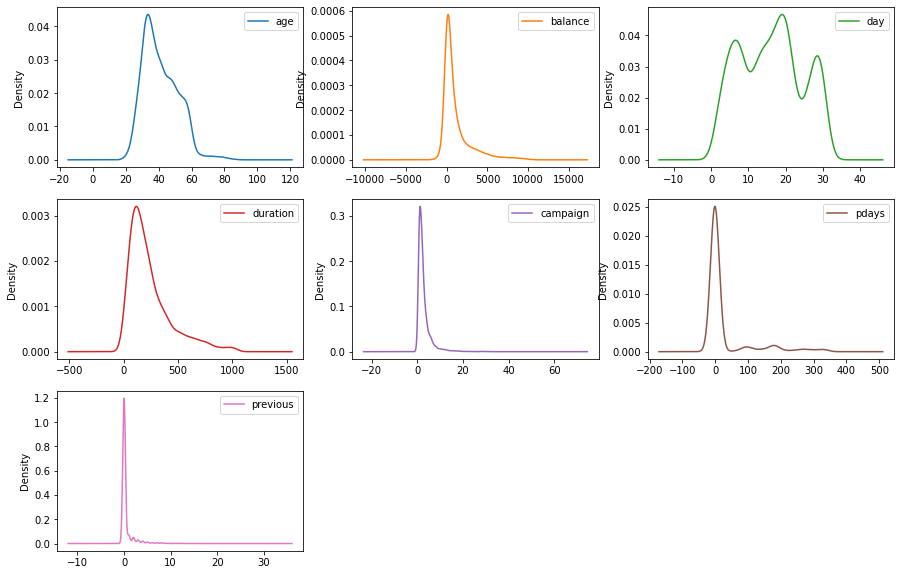

In [21]:
df.plot(figsize=(15,10), kind='density', subplots=True, layout=(3,3), sharex=False);

**Density Plots:**  
With the excpetion of age, and day (which we saw in the descriptive statistics), all of the other variables show high concentrations of values around the mean, and significant outliers. These will be examined later to see how they should be treated in the dataset. 

One plot we can look at with a little more detail, **age**.

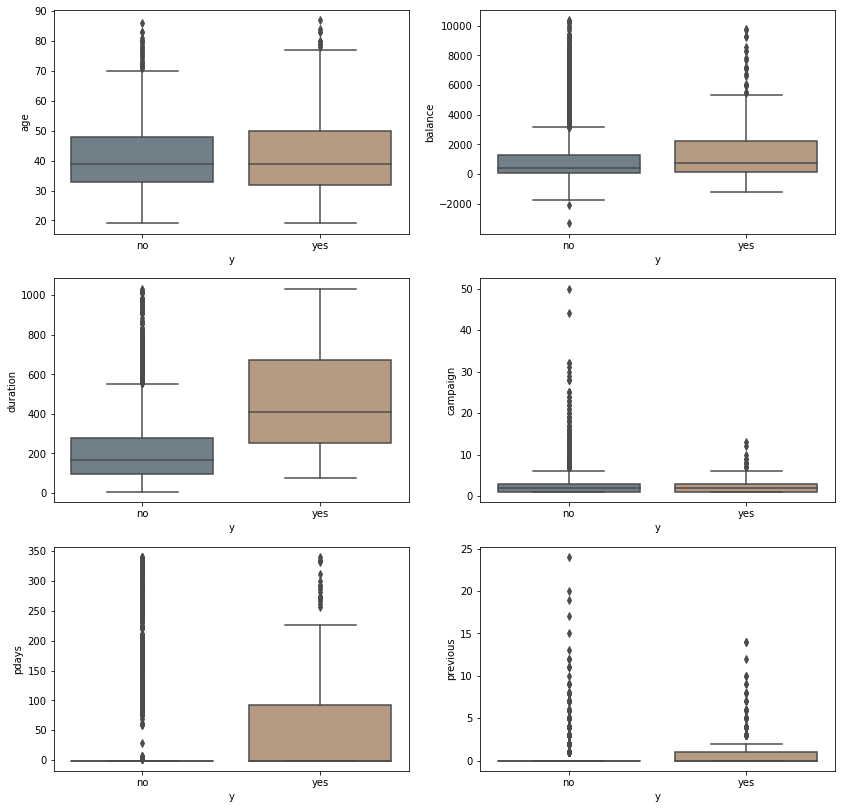

In [37]:
# using seaborn library, plot each individually
fig, axes = plt.subplots(3, 2, figsize=(14,14))

ax = sns.boxplot(x="y", y="age", data=df, ax=axes[0, 0], palette=['#6D808C', '#BF9B7A'])
ax = sns.boxplot(x="y", y="balance", data=df, ax=axes[0, 1], palette=['#6D808C', '#BF9B7A'])
ax = sns.boxplot(x="y", y="duration", data=df, ax=axes[1, 0], palette=['#6D808C', '#BF9B7A'])
ax = sns.boxplot(x="y", y="campaign", data=df, ax=axes[1, 1], palette=['#6D808C', '#BF9B7A'])
ax = sns.boxplot(x="y", y="pdays", data=df, ax=axes[2, 0], palette=['#6D808C', '#BF9B7A'])
ax = sns.boxplot(x="y", y="previous", data=df, ax=axes[2, 1], palette=['#6D808C', '#BF9B7A'])

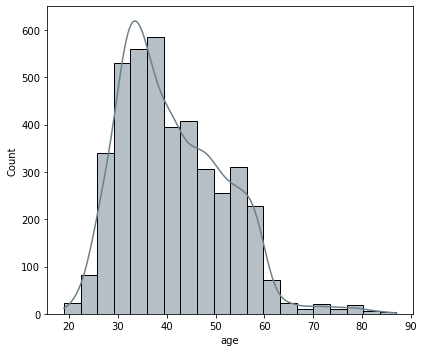

In [62]:
plt.figure(figsize=(6,5))
sns.histplot(x='age', data=df, bins=20, color='#6D808C', kde=True)

plt.tight_layout()
plt.savefig('eda_hist.png', dpi=300);

**Age:** The age distribution shows a right skewed distribution with more values falling into the younger ages.

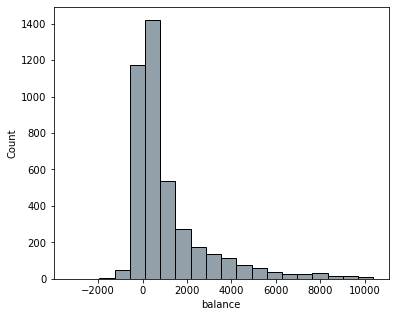

In [23]:
plt.figure(figsize=(6,5))
sns.histplot(x='balance', data=df, bins=20, color='#6D808C');

### Multivariate Plots

Starting with Pair-wise plots to see if there are any obvious relationships in the data.

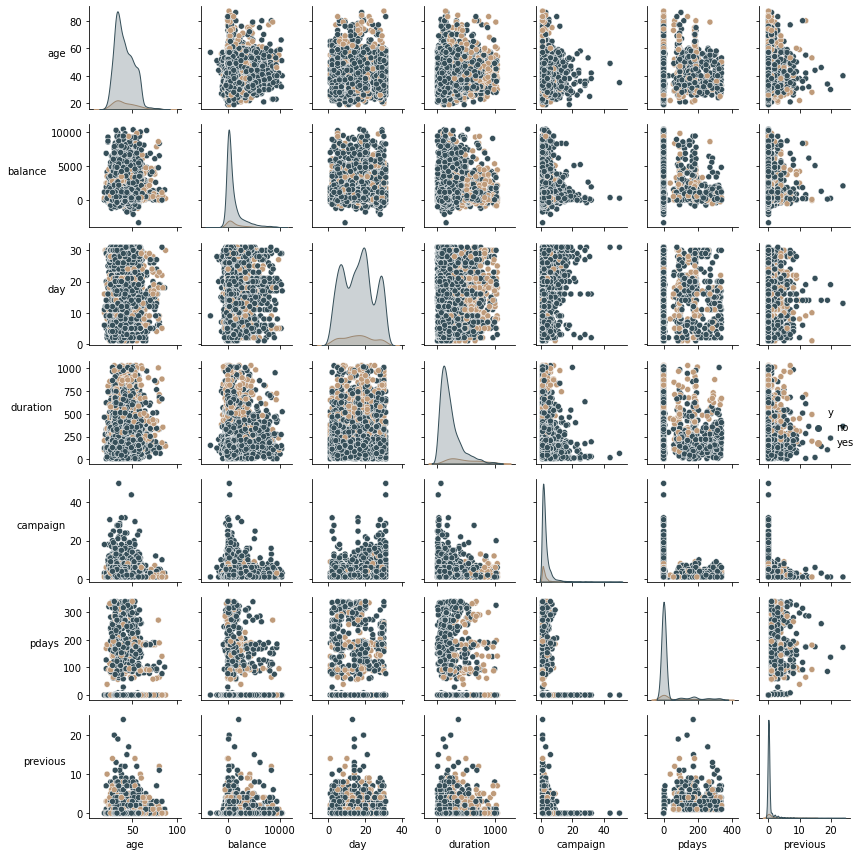

In [24]:
# Using seaborn, pairwise plot by y

g=sns.pairplot(df, diag_kind = 'auto', hue="y", palette=['#364F59', '#BF9B7A'])
g.fig.set_size_inches(12,12);

# rotate labels
for ax in g.axes.flatten():
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
    
plt.tight_layout()
plt.savefig('eda_pairs.png', dpi=300);

**Observations:** 

Upon comparing all numeric variables against each other, it's not clear if there are any obvious relationships between variables (positive or negative correlations).  We can test this next to be sure.

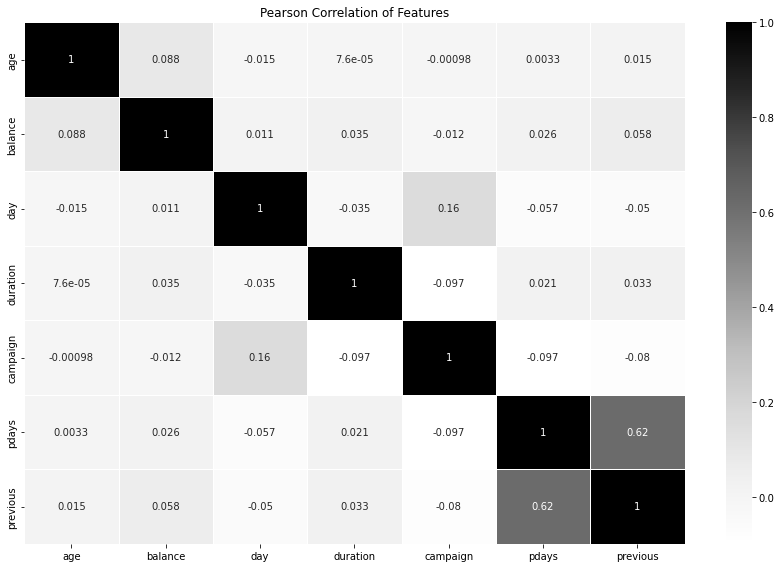

In [73]:
# using seaboarn to plot correlation heat map
corr = df.corr()

f, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(corr, cmap='Greys', annot=True, square=False, ax=ax,  linewidth = 1)
plt.title('Pearson Correlation of Features')

plt.tight_layout()
plt.savefig('eda_corr.png', dpi=300);

**Observations:**  
After running a Pearson's Correlation on the numeric values, there is not a strong corrrelation between variables.  The strongest is `previous` vs. `pdays` at `0.58`.  As a reminder `previous` is the number of contacts to the customer in prior marketing campaigns, and `pdays` is the number of days since last contact in this campaign.

### Demographic Plots

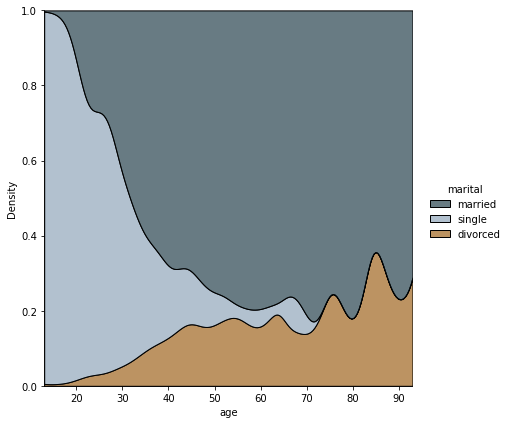

In [34]:
sns.displot(data=df, x="age", hue="marital", kind="kde", 
            height=6, multiple="fill", clip=(0, None), 
            palette=['#364F59', '#99ADBF', '#A66F2D'])

plt.savefig('eda_marital.png', dpi=300);

**Age / Marital Status:** When plotting `Marital` status over age on a density estimate plot, the `single` population tends to be younger, as expected, with `married` growing in population.  `Divorced` also grows with age but is a smaller proportion of the total.

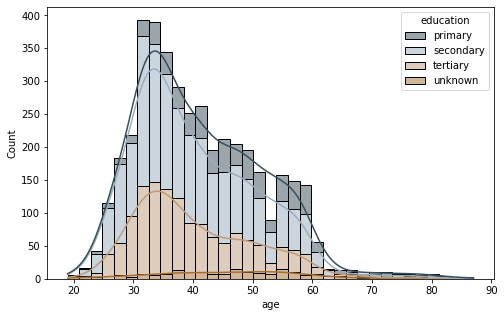

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(x='age', data=df, hue='education', multiple='stack', kde=True, palette=['#364F59', '#99ADBF', '#BF9B7A', '#A66F2D']);

**Age/Education:** There are relativley few people in the dataset that have an `unknown` education level, The rest of the values are somewhat evenly distributed across ages, with `secondary` school being the largest proportion.

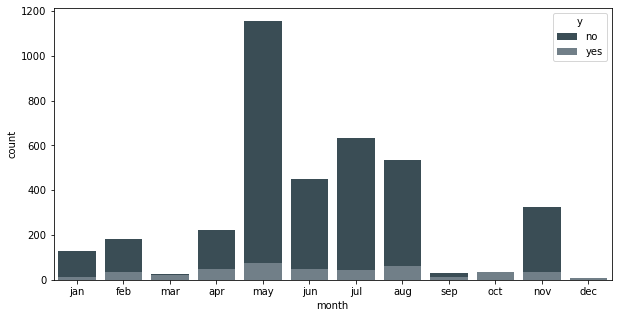

In [28]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
plt.figure(figsize=(10,5))
sns.countplot(x='month', data=df, hue='y', order=months, dodge=False, palette=['#364F59', '#6D808C', '#99ADBF', '#BF9B7A', '#A66F2D']);

**Month/Conversion:** The greatest months for overall activity are the summer months with November being another strong month.  There does't seem to be much with regards to correlating success by month ther than volume.

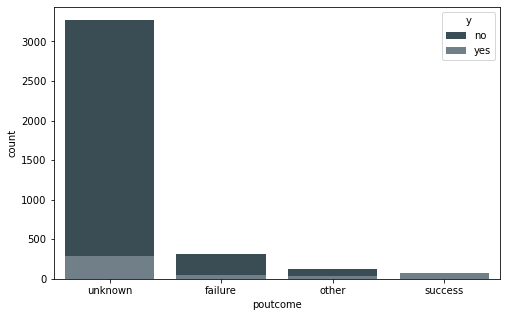

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x='poutcome', data=df, hue='y', dodge=False, palette=['#364F59', '#6D808C', '#99ADBF', '#BF9B7A', '#A66F2D']);

**Previous Campaign Outcome/Conversion:** If the client had a successful prior outcome, they also had a successful outcome with this campaign.  All other categories have some success rate shown, meanting this doesn't directly correlate with success or failure, but does have some indication.

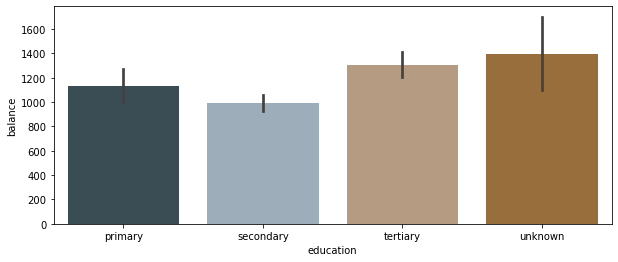

In [30]:
plt.figure(figsize=(10,4))
ax = sns.barplot(x="education", y="balance", data=df, palette=['#364F59', '#99ADBF', '#BF9B7A', '#A66F2D']);

**Eduacation/Balance:** People with `unknown` and `tertiary` levels of education tend to have slightly higher savings.  Those with secondary tend to have the lowest balance.

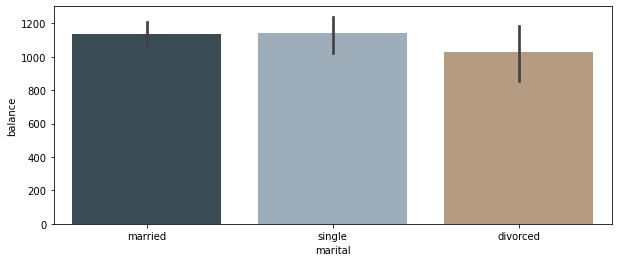

In [31]:
plt.figure(figsize=(10,4))
ax = sns.barplot(x="marital", y="balance", data=df, palette=['#364F59', '#99ADBF', '#BF9B7A']);

**Marital/Balance:** `Single` and `Married` people have a similar mean `balance`.  People who are `divorced` tend to have a lower balance.

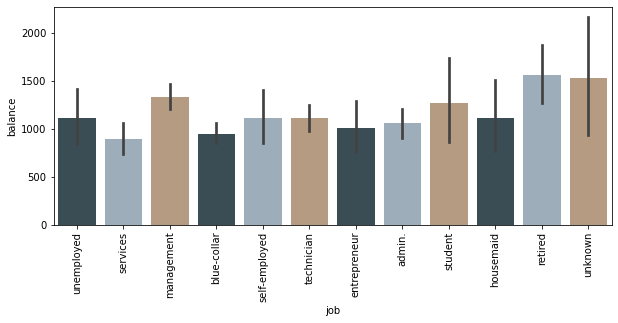

In [32]:
plt.figure(figsize=(10,4))
ax = sns.barplot(x="job", y="balance", data=df, palette=['#364F59', '#99ADBF', '#BF9B7A']);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

**Job/Balance:** Across the various jobs, `housemade` and `retired` are the leading savers.  On the other spectrum, `blue-collar`, `services` and `unemployed` have the lowest.

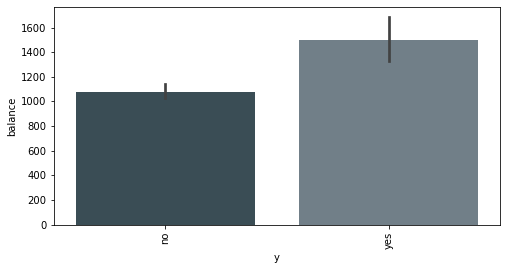

In [33]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="y", y="balance", data=df, palette=['#364F59', '#6D808C', '#99ADBF', '#BF9B7A', '#A66F2D'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);